In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

%matplotlib inline

In [2]:
import pandas as pd
cust_df = pd.read_csv("AB_NYC_2019.csv")
cust_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
df = cust_df.drop(['name','host_name','neighbourhood_group','neighbourhood','room_type','last_review','reviews_per_month','id','host_id'], axis=1)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,6,365
1,40.75362,-73.98377,225,1,45,2,355
2,40.80902,-73.94190,150,3,0,1,365
3,40.68514,-73.95976,89,1,270,1,194
4,40.79851,-73.94399,80,10,9,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-4.37652087e-01, -1.54930695e-02, -2.93996210e-01,
        -3.20413582e-01, -3.47164266e-02,  1.91625031e+00],
       [-6.84639148e-01,  3.00973546e-01, -2.93996210e-01,
         4.87664928e-01, -1.56104443e-01,  1.84027456e+00],
       [ 2.22496662e-01, -1.13290351e-02, -1.96484417e-01,
        -5.22433210e-01, -1.86451447e-01,  1.91625031e+00],
       ...,
       [ 7.58210126e-02, -1.57070239e-01,  1.44806857e-01,
        -5.22433210e-01, -1.86451447e-01, -6.51730078e-01],
       [-8.43880805e-01, -4.06912304e-01, -2.93996210e-01,
        -5.22433210e-01, -3.47164266e-02, -8.41669456e-01],
       [-8.05099504e-01, -2.61171100e-01, -1.46083215e-03,
        -5.22433210e-01, -1.86451447e-01, -6.82120378e-01]])

In [15]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 1 1 1]


In [16]:
df["Clus_km"] = labels
df.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Clus_km
0,40.64749,-73.97237,149,1,9,6,365,0
1,40.75362,-73.98377,225,1,45,2,355,0
2,40.80902,-73.94190,150,3,0,1,365,0
3,40.68514,-73.95976,89,1,270,1,194,0
4,40.79851,-73.94399,80,10,9,1,0,1


In [17]:
df.groupby('Clus_km').mean()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
Clus_km,,,,,,,
0,40.728929,-73.950627,189.899518,10.735138,33.954456,17.307070,281.337659
1,40.728940,-73.952879,123.918398,5.150610,18.028008,2.115187,29.011185
2,40.736699,-73.975251,4435.075949,24.417722,2.886076,2.721519,190.962025


In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('price', fontsize=18)
plt.ylabel('availability_365', fontsize=18)

plt.show()

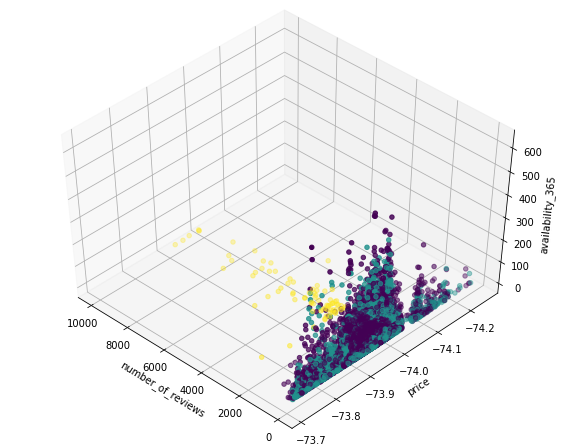

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('price')
ax.set_zlabel('availability_365')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float64))

In [20]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

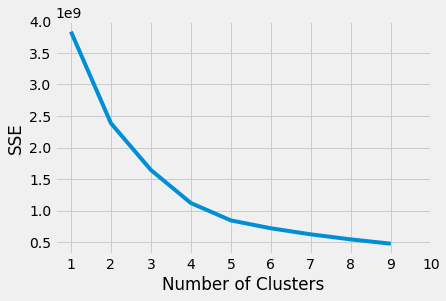

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()